In [84]:
from utils.iterative_greedy_algorithm import IG
from utils.visualization_animation import louvain_animation
from utils.communities_network import  calc_nmi, communities_to_labels
from utils.utils import read_community_labels_file_reel ,read_community_labels_file_synth , save_predicted_labels

import networkx as nx
import matplotlib.pyplot as plt

# Tests

In [85]:
# output paths for saving the results (Gif + predicted labels files)

animation_output_path = r"./output/animations"
saved_labels_output_path = r"./output/predicted_labels"

## 1.Reel

### 1.1 Karate

In [87]:

file_path = 'data/reel/karate/karate.gml'
G = nx.read_gml(file_path , label='id')
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

34

In [149]:
communities , modularity_trace , communities_trace , animation_frames = IG(adj_matrix, 20, beta=.5)


print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_reel("data/reel/karate/groundTruth.txt")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/karate")

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG done in 4 iterations
Founds 3 communities
NMI: 0.8040608897359829
Predicted labels saved to ./output/predicted_labels/karate.txt


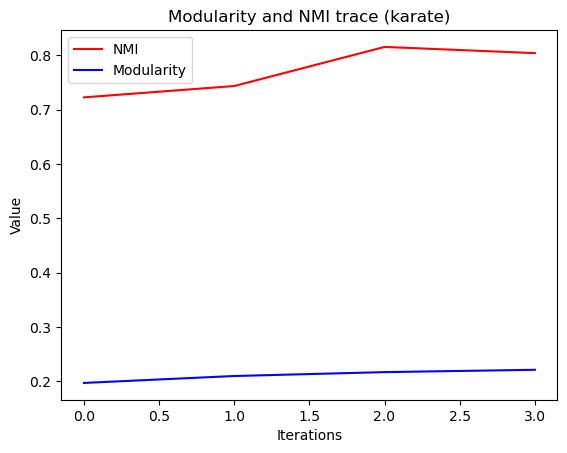

In [150]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (karate)")

plt.show()

The animation GIF is saved in ./output/animations/karate.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


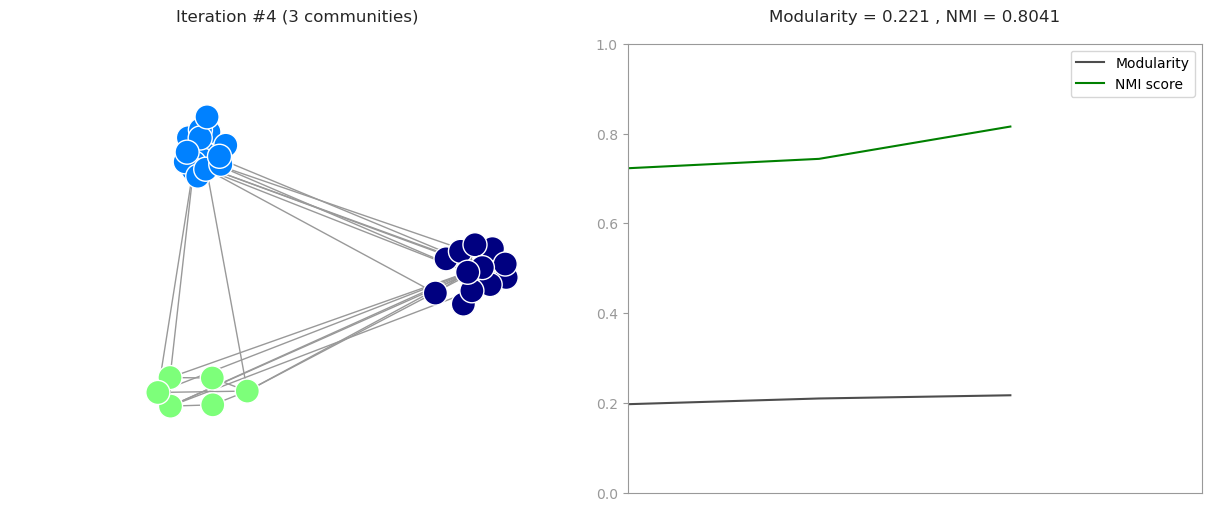

In [151]:
anim = louvain_animation(adj_matrix, animation_frames , nmi_trace, dark=False,
                  duration=60, filename=f"{animation_output_path}/karate.gif", dpi=200)

### 1.2 Dolphins dataset

In [152]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path,  label='id')
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [209]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 100, beta=.6)


print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_reel(
    "data/reel/dolphins/groundTruth.txt")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/dolphins")

IG:   0%|          | 0/100 [00:00<?, ?it/s]

IG done in 12 iterations
Founds 4 communities
NMI: 0.6357092395969717
Predicted labels saved to ./output/predicted_labels/dolphins.txt


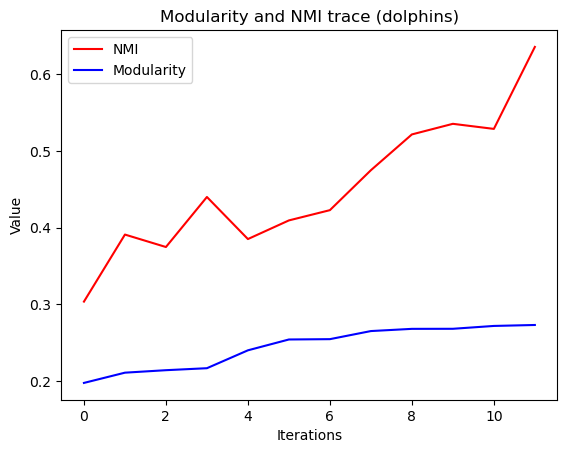

In [210]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (dolphins)")

plt.show()

The animation GIF is saved in ./output/animations/dolphins.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


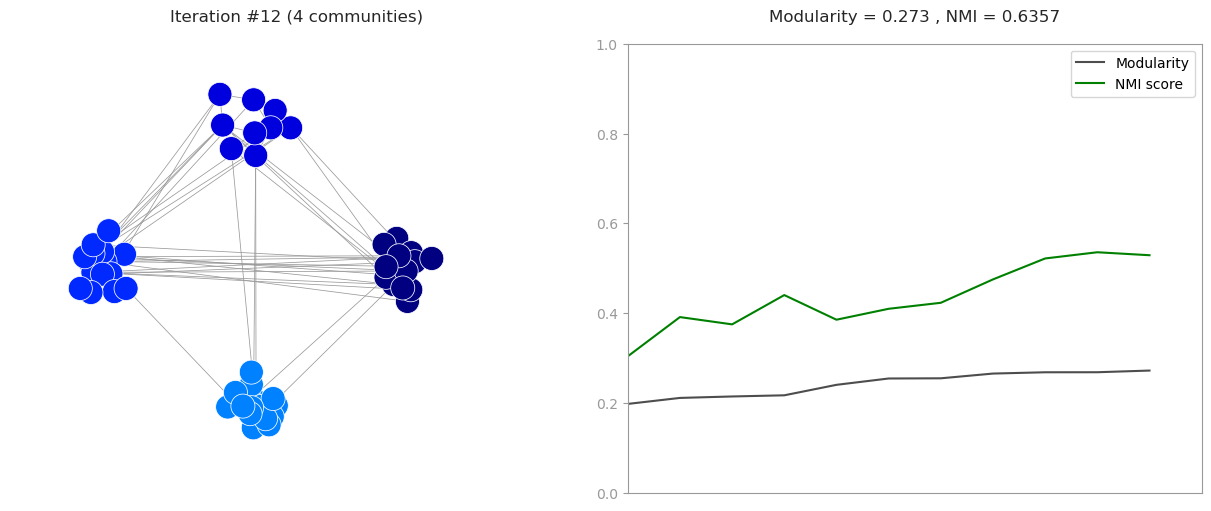

In [211]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/dolphins.gif", dpi=200)

## 2.Synthetic Datastes

### 2.1 LRF 0.15

In [212]:

file_path = 'data/synth/LFR/0.15/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [213]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 20, beta=.5)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth("data/synth/LFR/0.15/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.15")

IG:   0%|          | 0/20 [00:00<?, ?it/s]

IG done in 8 iterations
Founds 4 communities
NMI: 1.0
Predicted labels saved to ./output/predicted_labels/LRF_0.15.txt


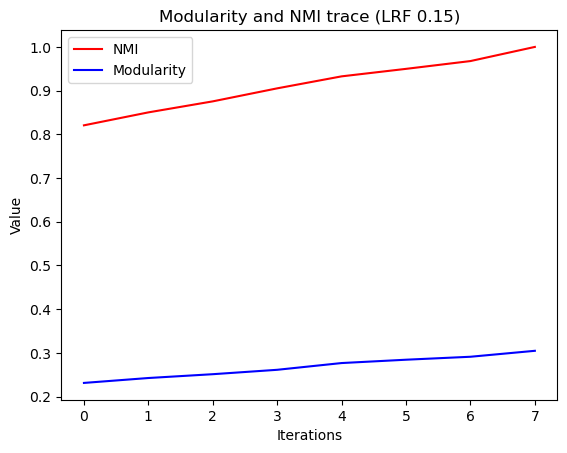

In [214]:
plt.plot(nmi_trace , label="NMI" , color="red")
plt.plot(modularity_trace , label="Modularity" , color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.15)")

plt.show()

The animation GIF is saved in ./output/animations/LRF15.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


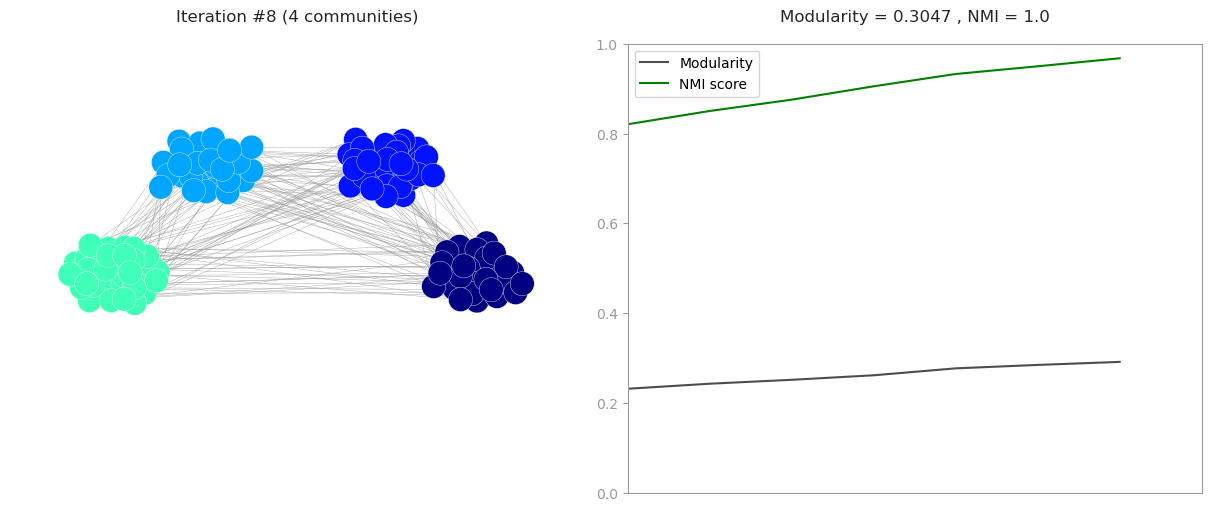

In [215]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF15.gif", dpi=200)

### 2.2 LRF 0.40

In [216]:

file_path = 'data/synth/LFR/0.40/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [222]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 100, beta=.4)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.40/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.40")

IG:   0%|          | 0/100 [00:00<?, ?it/s]

IG done in 11 iterations
Founds 4 communities
NMI: 1.0
Predicted labels saved to ./output/predicted_labels/LRF_0.40.txt


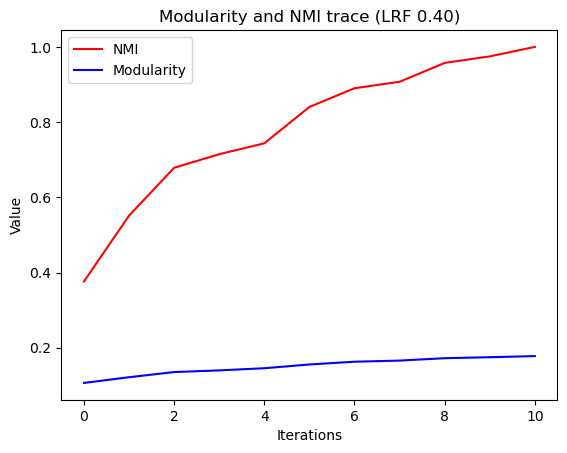

In [223]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.40)")
plt.show()

The animation GIF is saved in ./output/animations/LRF40.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


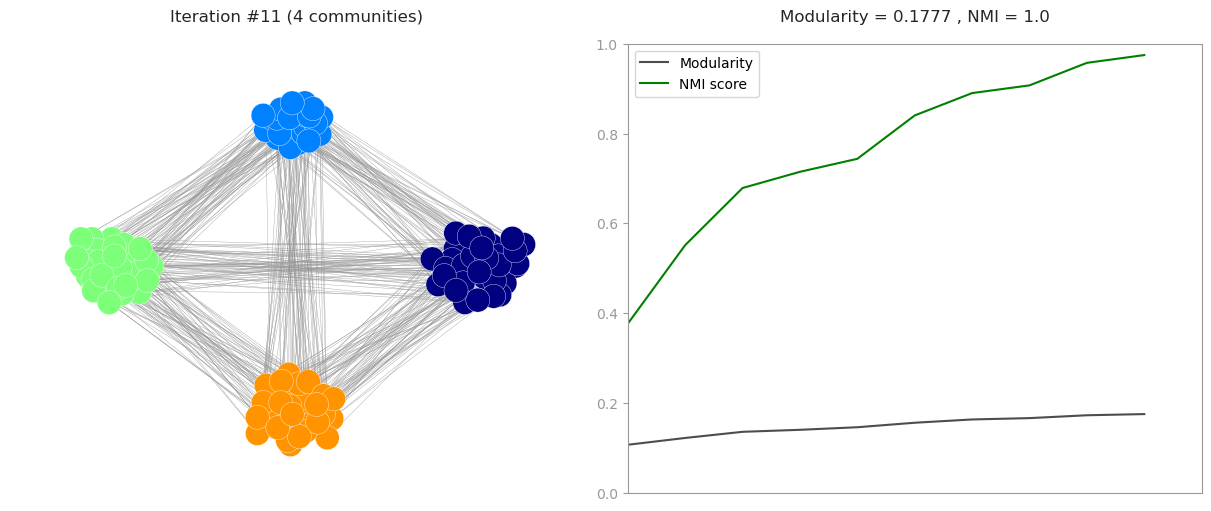

In [224]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF40.gif", dpi=200)

### LRF 0.50

In [225]:

file_path = 'data/synth/LFR/0.50/network.dat'
G = nx.read_edgelist(file_path, nodetype=int)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

128

In [238]:
communities, modularity_trace, communities_trace, animation_frames = IG(
    adj_matrix, 100, beta=.4)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_synth(
    "data/synth/LFR/0.50/community.dat")
labels_trace = [communities_to_labels(G, c) for c in communities_trace]
nmi_trace = [calc_nmi(true_communities, labels) for labels in labels_trace]
print(f"NMI: {nmi_trace[-1]}")
save_predicted_labels(labels_trace[-1], f"{saved_labels_output_path}/LRF_0.50")

IG:   0%|          | 0/100 [00:00<?, ?it/s]

IG done in 25 iterations
Founds 2 communities
NMI: 0.599792558562428
Predicted labels saved to ./output/predicted_labels/LRF_0.50.txt


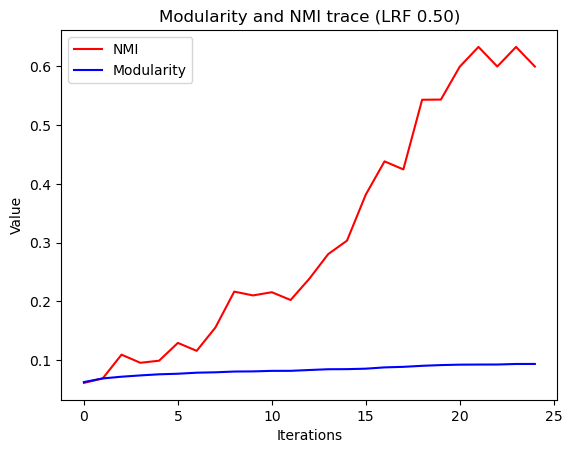

In [239]:
plt.plot(nmi_trace, label="NMI", color="red")
plt.plot(modularity_trace, label="Modularity", color="blue")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Value")
plt.title("Modularity and NMI trace (LRF 0.50)")

plt.show()

The animation GIF is saved in ./output/animations/LRF50.gif


MovieWriter ffmpeg unavailable; using Pillow instead.


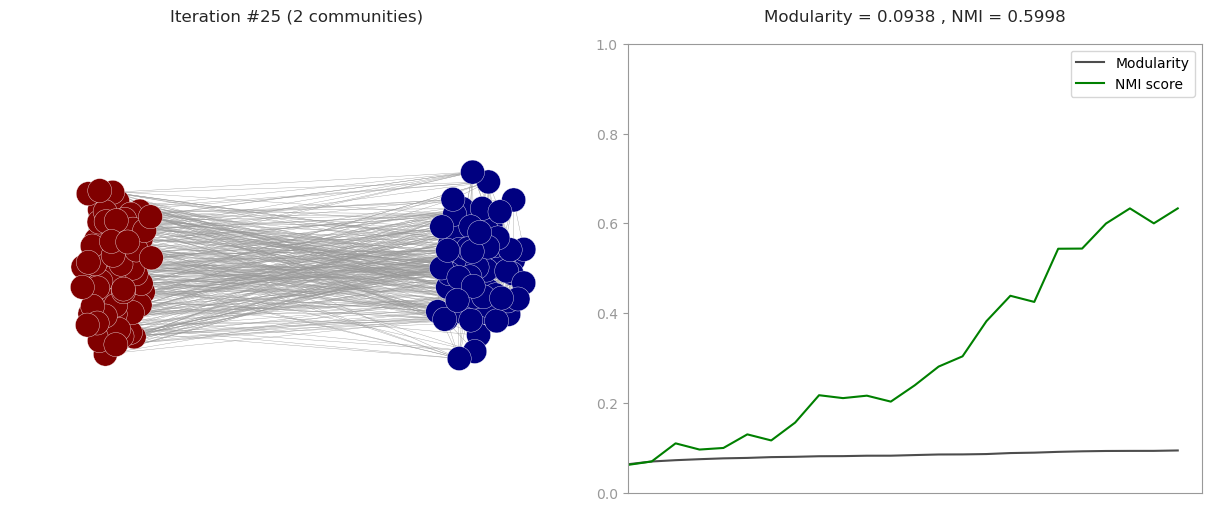

In [240]:
anim = louvain_animation(adj_matrix, animation_frames, nmi_trace, dark=False,
                         duration=60, filename=f"{animation_output_path}/LRF50.gif", dpi=200)